<a href="https://colab.research.google.com/github/FaustoJuarez/Machine-Learning-Journey/blob/main/DetectarInsectos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

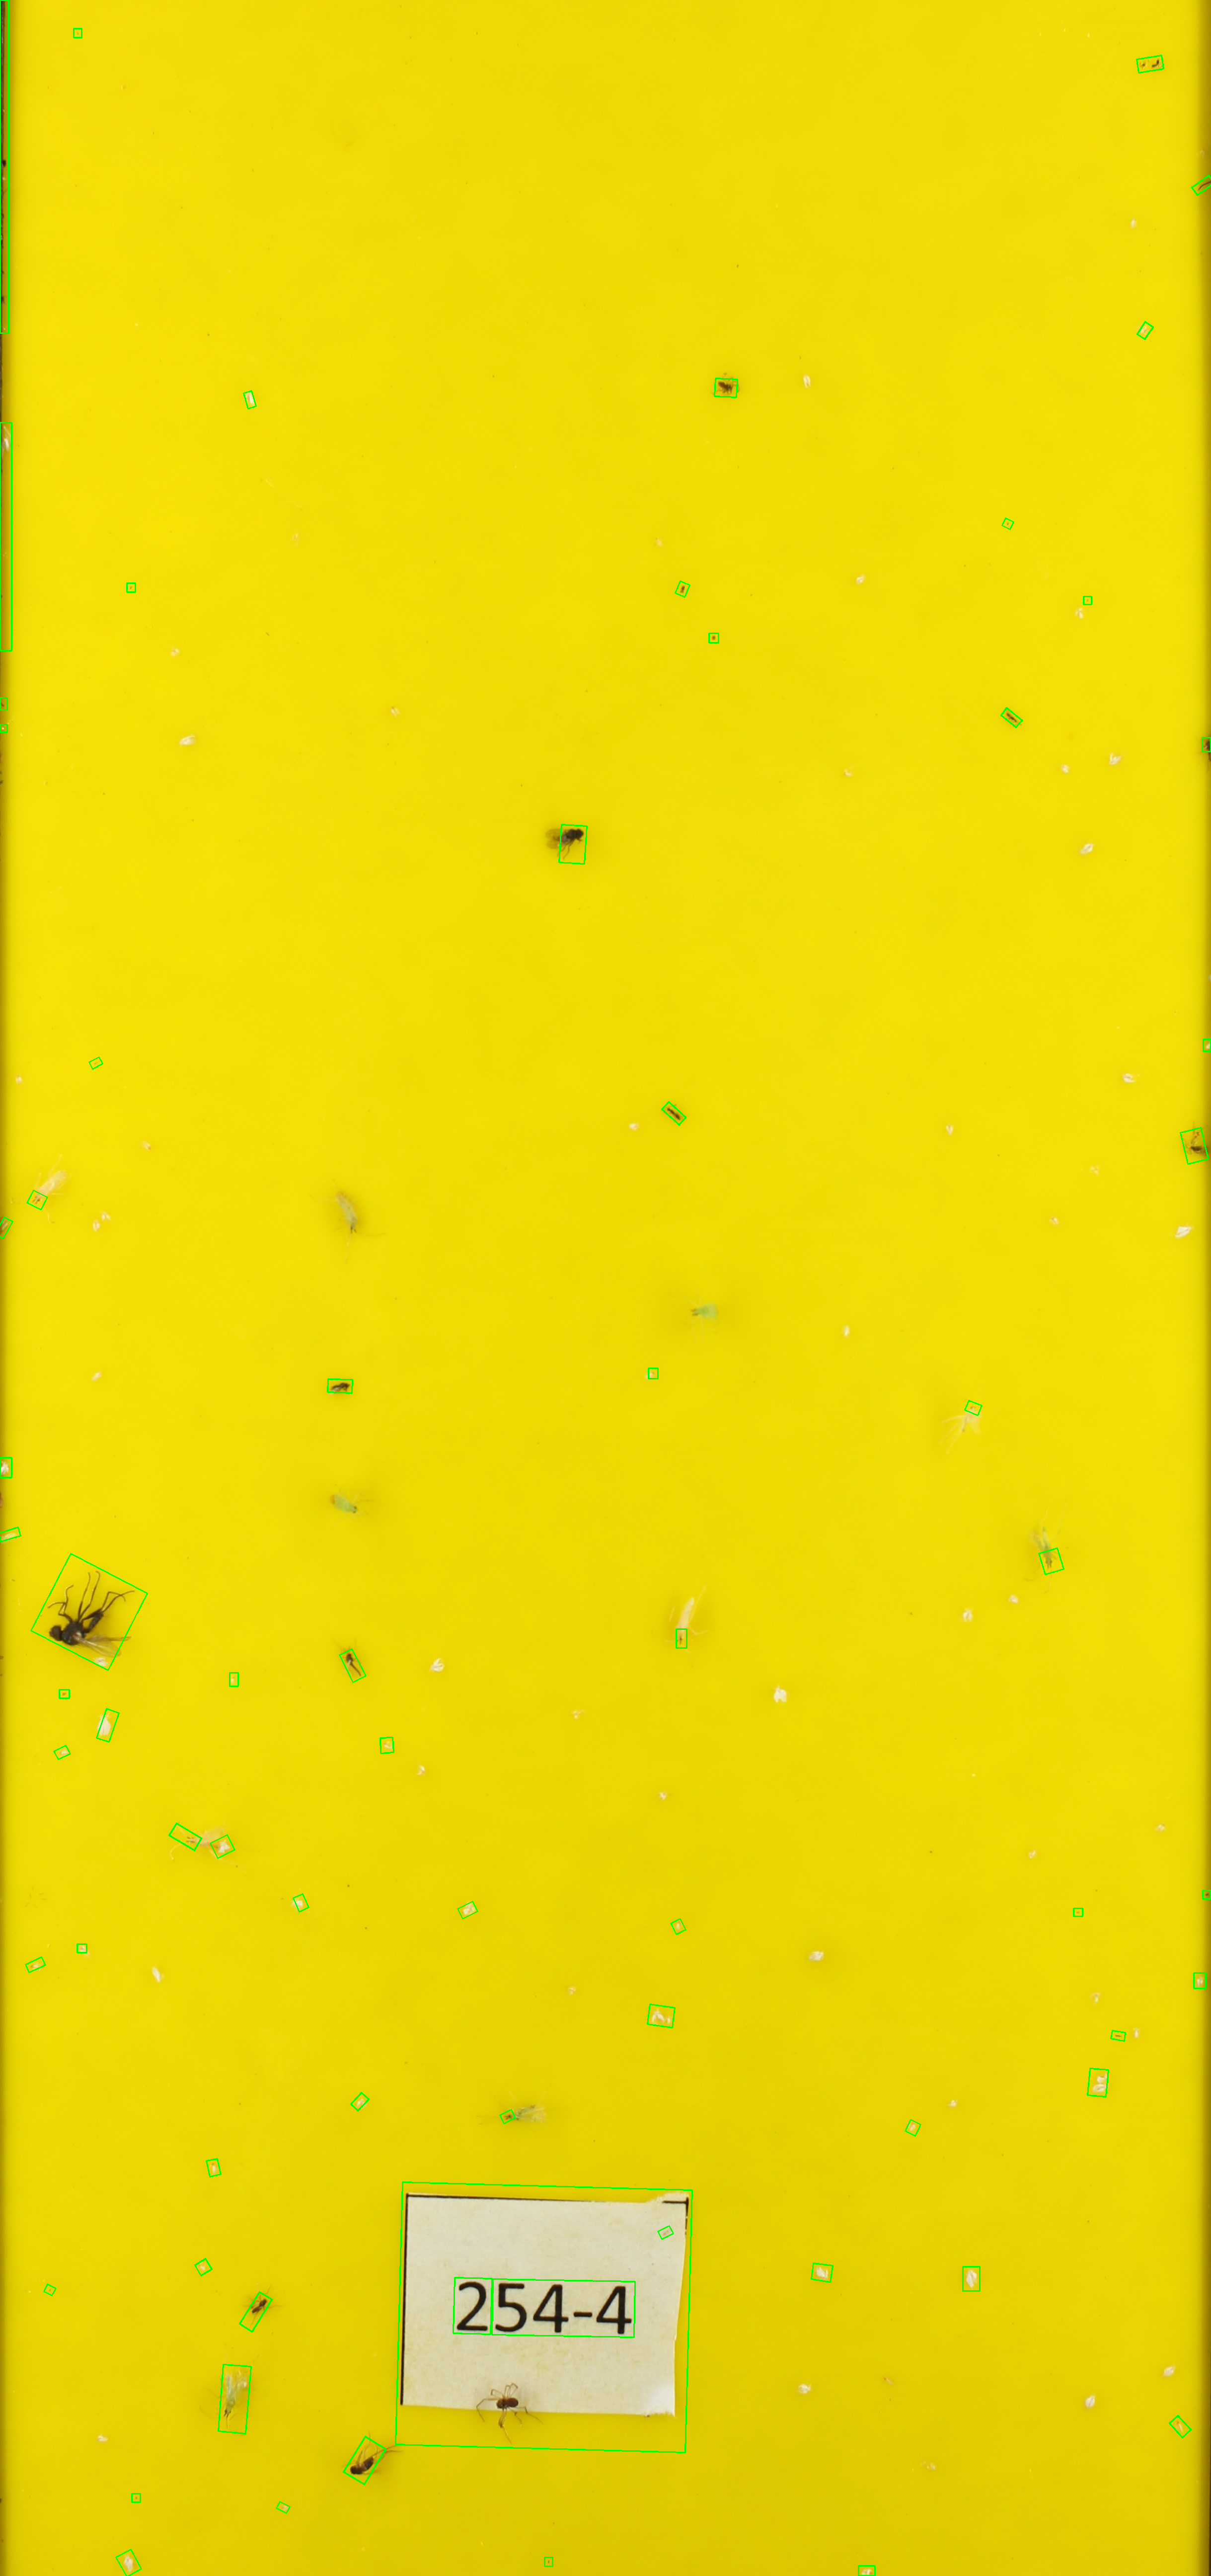

Number of insects: 72


In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread("/content/sticktrap2.jpg")

# Convert the image to grayscale and enhance contrast
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
gray = clahe.apply(gray)

# Apply Gaussian blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect edges using Canny edge detection
edges = cv2.Canny(blur, 50, 150)

# Dilate the edges to connect nearby edges and fill gaps
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
dilated = cv2.dilate(edges, kernel, iterations=3)

# Find contours of objects in the binary image
contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Count the number of insects and draw the contours on the original image
num_insects = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 100:  # filter out small objects
        rect = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(image, [box], 0, (0, 255, 0), 2)
        num_insects += 1

# Display the image with the contours and the number of insects
cv2_imshow(image)
print('Number of insects:', num_insects)

# Wait for a key press and then close the window
cv2.waitKey(0)
cv2.destroyAllWindows()


